In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Daily data

In [29]:
data = pd.read_csv('dGOOG.csv')
data = data[['Date', 'Adj Close']]
data.columns = ['Date', 'precio']

In [30]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data = data.set_index('Date')

In [31]:
data.head()

,precio,year,month,day
Date,,,,
2016-12-27,791.549988,2016,12,27
2016-12-28,785.049988,2016,12,28
2016-12-29,782.789978,2016,12,29
2016-12-30,771.820007,2016,12,30
2017-01-03,786.140015,2017,1,3


<AxesSubplot:title={'center':'Alphabet'}, xlabel='Date'>

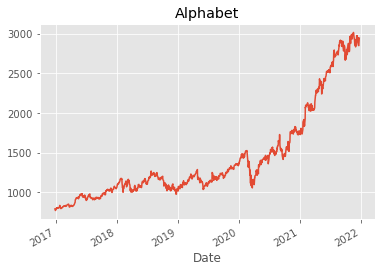

In [35]:
data['precio'].plot(title='Alphabet')

In [37]:
data['precio'].describe().round(2)

count    1258.00
mean     1435.79
std       588.99
min       771.82
25%      1054.35
50%      1194.54
75%      1559.00
max      3014.18
Name: precio, dtype: float64

<AxesSubplot:title={'center':'Alphabet'}, xlabel='Date'>

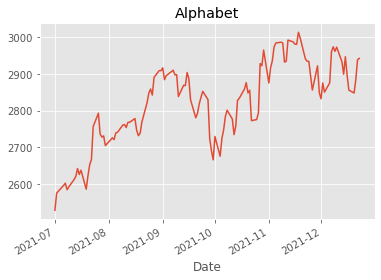

In [36]:
data['precio'].loc['2021-07':].plot(title='Alphabet')

In [38]:
# Último día de cada mes
day_max = data.groupby(['year', 'month'])[['day']].max().reset_index()
day_max.columns = ['year', 'month', 'last_day']

In [39]:
# Merge con data
data = data.merge(day_max, how='left', on=['year', 'month'])

In [40]:
# Monto a comprar: 1000 dólares el último día de cada mes
data['compra'] = np.where(data['day']==data['last_day'], 1000, np.nan)

In [42]:
# Cantidad de acciones compradas el último día de cada mes
data['acciones_compradas'] = data['compra'] / data['precio']

In [49]:
# Número de acciones compradas
data['acciones_compradas'].sum()

48.27495466052082

In [43]:
# Precio promedio pagado por acción
precio_promedio = data['compra'].sum() / data['acciones_compradas'].sum()
precio_promedio.round(2)

1263.6

In [45]:
# Diferencia porcentual con precio promedio de la acción
((precio_promedio / data['precio'].mean() - 1) * 100).round(2)

-11.99